# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

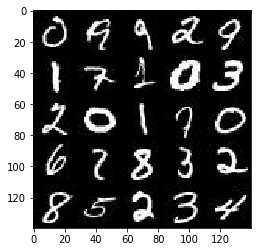

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

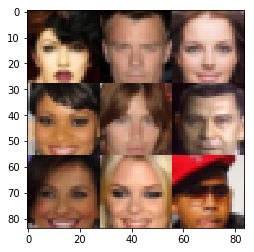

In [3]:
show_n_images = 9

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function    
    
    inputs_real=tf.placeholder(tf.float32,(None,image_width,image_height,image_channels),name='input_real')
   
    inputs_z=tf.placeholder(tf.float32,(None,z_dim),name='input_z')
    
    learning_rate=tf.placeholder(tf.float32,None,name='learning_rate')

    return inputs_real, inputs_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [58]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    #print("shape of image: {}".format(images.shape))
    # TODO: Implement Function
    alpha=0.05
    drop_out = 0.2
    
    with tf.variable_scope('discriminator',reuse=reuse):
        #Input Layer 28x28x3
        h1=tf.layers.conv2d(images,64,5,strides=2,padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        r1=tf.maximum(alpha*h1,h1)
        #16x16x32
        
        h2=tf.layers.conv2d(r1,128,5,strides=2,padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn2=tf.layers.batch_normalization(h2,training=True)
        r2=tf.maximum(alpha*bn2,bn2)
        #8x8x128
        
        h3=tf.layers.conv2d(r2,256,5,strides=2,padding='same',kernel_initializer=tf.contrib.layers.xavier_initializer())
        bn3=tf.layers.batch_normalization(h3,training=True)
        r3=tf.maximum(alpha*bn3,bn3)
        #4x4x256
        
        #Flattenning
        flattened=tf.reshape(r3,(-1,4*4*256))
        #logits=tf.layers.dense(flattened,1,kernel_initializer=tf.truncated_normal_initializer(stddev=0.02))
        logits=tf.layers.dense(flattened,1)
        out=tf.sigmoid(logits)      
                
    return out, logits

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [85]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    alpha=0.05
    drop_out = 0.9
    
    # TODO: Implement Function
    with tf.variable_scope('generator',reuse=not is_train):
        #First fully conn layer
        #h1=tf.layers.dense(z,7*7*512,kernel_initializer=tf.truncated_normal_initializer(stddev=0.02))
        h1=tf.layers.dense(z,7*7*512)
        
        #Reshape to begin conv
        h1=tf.reshape(h1,(-1,7,7,256))
        h1=tf.layers.batch_normalization(h1,training=is_train)
        h1=tf.maximum(alpha*h1,h1)
        #4x4x512
        
        h2=tf.layers.conv2d_transpose(h1,256,5,strides=2,padding='same'
                                      ,kernel_initializer=tf.contrib.layers.xavier_initializer())
        #h2=tf.nn.dropout(h2,drop_out)
        h2=tf.layers.batch_normalization(h2,training=is_train)
        h2=tf.maximum(alpha*h2,h2)
        #8x8x256
        
        h3=tf.layers.conv2d_transpose(h2,128,5,strides=2,padding='same'
                                      ,kernel_initializer=tf.contrib.layers.xavier_initializer())
        #h3=tf.nn.dropout(h3,drop_out)
        h3=tf.layers.batch_normalization(h3,training=is_train)
        h3=tf.maximum(alpha*h3,h3)
        #16x16x128        
                
        #Output
        logits=tf.layers.conv2d_transpose(h3,out_channel_dim,5,strides=1,padding='same'
                                          ,kernel_initializer=tf.contrib.layers.xavier_initializer())    
        #logits=tf.nn.dropout(logits,drop_out)
        #28x28x_        
        out=tf.tanh(logits)  
                        
    return out

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [86]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    
    g_model=generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model,reuse=True)
    
    d_loss_real=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real,labels=tf.ones_like(d_model_real)
                                                                       *(1-smooth)))
    
    d_loss_fake=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.zeros_like(d_model_fake)))
    
    g_loss=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,labels=tf.ones_like(d_model_fake)))
    
    d_loss=d_loss_real+d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [87]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars=tf.trainable_variables()
    g_vars=[var for var in t_vars if var.name.startswith('generator')]
    d_vars=[var for var in t_vars if var.name.startswith('discriminator')]
    
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt=tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(d_loss,var_list=d_vars)
        g_train_opt=tf.train.AdamOptimizer(learning_rate,beta1=beta1).minimize(g_loss,var_list=g_vars)
    
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [88]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [89]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    
    if (data_image_mode == "L"):
        out_channel_dim=1
    else:
        out_channel_dim=3
    
    
    #out_channel_dim=data_shape[3]
    
    #print("data shape: 1:{0} 2:{1} 3:{2}".format(data_shape[1], data_shape[2], data_shape[3]))
    
    # TODO: Build Model           
    input_real,input_z,lr= model_inputs(data_shape[1], data_shape[2], data_shape[3], z_dim)
    lr=learning_rate
    #return inputs_real, inputs_z, learning_rate_placeholder
    
    d_loss, g_loss= model_loss(input_real, input_z, out_channel_dim)
    #d_loss, g_loss= model_loss(input_real, input_z, data_shape[3])
    #return d_loss,g_loss
    
    d_opt, g_opt = model_opt(d_loss, g_loss, lr, beta1)
    #return d_train_opt, g_train_opt
        
    #saver=tf.train.Saver()    
    
    samples,losses=[],[]
    steps=0
    
    print_each=10
    show_each=100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                
                batch_images = batch_images * 2
                
                #Random Noise
                batch_z=np.random.uniform(-1,1,size=(batch_size,z_dim))
                
                #Optimizers
                _ =sess.run(d_opt,feed_dict={input_real:batch_images,input_z:batch_z})
                _=sess.run(g_opt,feed_dict={input_z:batch_z,input_real:batch_images})
              
                #print(steps)
                if steps % print_each == 0:
                    train_loss_d=d_loss.eval({input_z:batch_z,input_real:batch_images})
                    train_loss_g=g_loss.eval({input_z:batch_z})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epochs),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))    
                    
                #show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
                if steps % show_each == 0:
                    show_generator_output(sess, 9, input_z, data_shape[3], data_image_mode)                  
                                                       
        show_generator_output(sess, 9, input_z, data_shape[3], data_image_mode)
                                                                                 
                       

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.5983... Generator Loss: 2.4994
Epoch 1/2... Discriminator Loss: 0.6410... Generator Loss: 1.7727
Epoch 1/2... Discriminator Loss: 0.9266... Generator Loss: 3.3099
Epoch 1/2... Discriminator Loss: 1.3132... Generator Loss: 0.8516
Epoch 1/2... Discriminator Loss: 1.2611... Generator Loss: 1.4857
Epoch 1/2... Discriminator Loss: 1.2518... Generator Loss: 1.8515
Epoch 1/2... Discriminator Loss: 1.0816... Generator Loss: 1.2833
Epoch 1/2... Discriminator Loss: 1.5723... Generator Loss: 0.4661
Epoch 1/2... Discriminator Loss: 1.2122... Generator Loss: 1.7133
Epoch 1/2... Discriminator Loss: 1.3696... Generator Loss: 0.5510


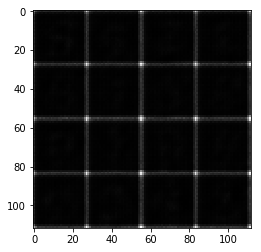

Epoch 1/2... Discriminator Loss: 1.0799... Generator Loss: 1.2905
Epoch 1/2... Discriminator Loss: 1.1244... Generator Loss: 1.2244
Epoch 1/2... Discriminator Loss: 1.1765... Generator Loss: 0.8863
Epoch 1/2... Discriminator Loss: 1.2365... Generator Loss: 0.7510
Epoch 1/2... Discriminator Loss: 1.4837... Generator Loss: 0.4794
Epoch 1/2... Discriminator Loss: 1.3045... Generator Loss: 0.5792
Epoch 1/2... Discriminator Loss: 1.1277... Generator Loss: 0.8553
Epoch 1/2... Discriminator Loss: 1.1111... Generator Loss: 0.8466
Epoch 1/2... Discriminator Loss: 1.1089... Generator Loss: 0.8180
Epoch 1/2... Discriminator Loss: 1.0322... Generator Loss: 0.9340


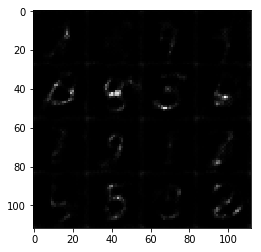

Epoch 1/2... Discriminator Loss: 1.2416... Generator Loss: 1.9585
Epoch 1/2... Discriminator Loss: 1.0293... Generator Loss: 1.4123
Epoch 1/2... Discriminator Loss: 1.0135... Generator Loss: 1.2514
Epoch 1/2... Discriminator Loss: 1.0888... Generator Loss: 0.9155
Epoch 1/2... Discriminator Loss: 1.0869... Generator Loss: 1.4798
Epoch 1/2... Discriminator Loss: 1.1572... Generator Loss: 0.8052
Epoch 1/2... Discriminator Loss: 1.1777... Generator Loss: 0.7184
Epoch 1/2... Discriminator Loss: 1.0052... Generator Loss: 1.2486
Epoch 1/2... Discriminator Loss: 1.1428... Generator Loss: 0.7226
Epoch 1/2... Discriminator Loss: 1.2036... Generator Loss: 0.6602


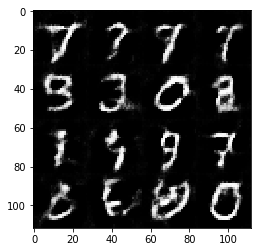

Epoch 1/2... Discriminator Loss: 1.5689... Generator Loss: 0.4095
Epoch 1/2... Discriminator Loss: 1.0398... Generator Loss: 0.8898
Epoch 1/2... Discriminator Loss: 0.9967... Generator Loss: 1.2101
Epoch 1/2... Discriminator Loss: 1.3609... Generator Loss: 0.5243
Epoch 1/2... Discriminator Loss: 0.9181... Generator Loss: 1.1387
Epoch 1/2... Discriminator Loss: 1.0952... Generator Loss: 0.8734
Epoch 1/2... Discriminator Loss: 1.4003... Generator Loss: 0.5159
Epoch 1/2... Discriminator Loss: 1.0881... Generator Loss: 1.7311
Epoch 1/2... Discriminator Loss: 1.0430... Generator Loss: 0.9312
Epoch 1/2... Discriminator Loss: 1.0597... Generator Loss: 1.0515


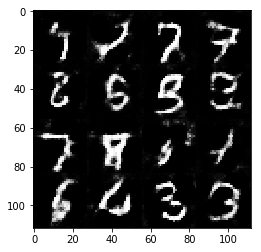

Epoch 1/2... Discriminator Loss: 1.1275... Generator Loss: 0.7824
Epoch 1/2... Discriminator Loss: 1.1439... Generator Loss: 0.9064
Epoch 1/2... Discriminator Loss: 1.0247... Generator Loss: 1.3464
Epoch 1/2... Discriminator Loss: 1.4788... Generator Loss: 0.4515
Epoch 1/2... Discriminator Loss: 1.1490... Generator Loss: 0.7557
Epoch 1/2... Discriminator Loss: 1.2918... Generator Loss: 1.6733
Epoch 1/2... Discriminator Loss: 1.1627... Generator Loss: 1.0347
Epoch 1/2... Discriminator Loss: 1.0269... Generator Loss: 1.0337
Epoch 1/2... Discriminator Loss: 1.0419... Generator Loss: 1.1309
Epoch 1/2... Discriminator Loss: 1.2366... Generator Loss: 0.6502


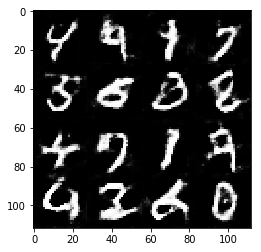

Epoch 1/2... Discriminator Loss: 1.0369... Generator Loss: 1.2585
Epoch 1/2... Discriminator Loss: 1.2308... Generator Loss: 1.6452
Epoch 1/2... Discriminator Loss: 1.1114... Generator Loss: 1.1079
Epoch 1/2... Discriminator Loss: 1.0751... Generator Loss: 1.1959
Epoch 1/2... Discriminator Loss: 1.1080... Generator Loss: 0.8182
Epoch 1/2... Discriminator Loss: 1.0859... Generator Loss: 1.1797
Epoch 1/2... Discriminator Loss: 1.1711... Generator Loss: 1.5452
Epoch 1/2... Discriminator Loss: 1.3212... Generator Loss: 0.5578
Epoch 1/2... Discriminator Loss: 1.2193... Generator Loss: 0.6726
Epoch 1/2... Discriminator Loss: 1.1476... Generator Loss: 0.6989


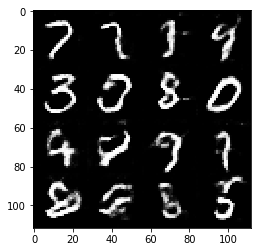

Epoch 1/2... Discriminator Loss: 1.1303... Generator Loss: 1.2495
Epoch 1/2... Discriminator Loss: 1.2678... Generator Loss: 0.6138
Epoch 1/2... Discriminator Loss: 1.0426... Generator Loss: 1.5022
Epoch 1/2... Discriminator Loss: 1.1018... Generator Loss: 0.7839
Epoch 1/2... Discriminator Loss: 1.3512... Generator Loss: 0.5328
Epoch 1/2... Discriminator Loss: 0.9946... Generator Loss: 1.2031
Epoch 1/2... Discriminator Loss: 0.9537... Generator Loss: 1.0931
Epoch 1/2... Discriminator Loss: 1.1193... Generator Loss: 0.9381
Epoch 1/2... Discriminator Loss: 1.1929... Generator Loss: 0.6786
Epoch 1/2... Discriminator Loss: 1.3091... Generator Loss: 0.5801


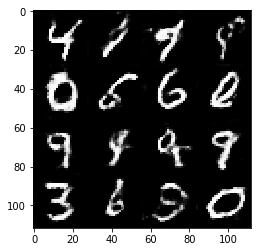

Epoch 1/2... Discriminator Loss: 1.1156... Generator Loss: 0.7743
Epoch 1/2... Discriminator Loss: 1.1337... Generator Loss: 1.8551
Epoch 1/2... Discriminator Loss: 1.1795... Generator Loss: 0.7080
Epoch 1/2... Discriminator Loss: 1.1759... Generator Loss: 0.6984
Epoch 1/2... Discriminator Loss: 1.1041... Generator Loss: 0.8710
Epoch 1/2... Discriminator Loss: 1.0150... Generator Loss: 1.1810
Epoch 1/2... Discriminator Loss: 0.9680... Generator Loss: 1.2488
Epoch 1/2... Discriminator Loss: 1.2656... Generator Loss: 1.5176
Epoch 1/2... Discriminator Loss: 1.0176... Generator Loss: 0.9652
Epoch 1/2... Discriminator Loss: 1.1821... Generator Loss: 0.6714


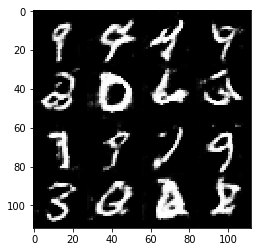

Epoch 1/2... Discriminator Loss: 1.5242... Generator Loss: 0.4560
Epoch 1/2... Discriminator Loss: 0.9882... Generator Loss: 1.0614
Epoch 1/2... Discriminator Loss: 1.0601... Generator Loss: 0.8927
Epoch 1/2... Discriminator Loss: 1.1236... Generator Loss: 0.9235
Epoch 1/2... Discriminator Loss: 1.2545... Generator Loss: 0.6098
Epoch 1/2... Discriminator Loss: 1.4312... Generator Loss: 0.5151
Epoch 1/2... Discriminator Loss: 1.0556... Generator Loss: 1.0110
Epoch 1/2... Discriminator Loss: 0.9749... Generator Loss: 1.0587
Epoch 1/2... Discriminator Loss: 1.1881... Generator Loss: 1.7636
Epoch 1/2... Discriminator Loss: 1.1005... Generator Loss: 0.9607


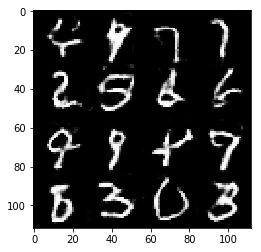

Epoch 1/2... Discriminator Loss: 1.2703... Generator Loss: 0.6113
Epoch 1/2... Discriminator Loss: 1.0547... Generator Loss: 1.0503
Epoch 1/2... Discriminator Loss: 1.1060... Generator Loss: 1.0382
Epoch 2/2... Discriminator Loss: 1.0702... Generator Loss: 1.2897
Epoch 2/2... Discriminator Loss: 1.1940... Generator Loss: 0.6985
Epoch 2/2... Discriminator Loss: 1.1615... Generator Loss: 0.6996
Epoch 2/2... Discriminator Loss: 1.0542... Generator Loss: 0.9736
Epoch 2/2... Discriminator Loss: 2.1937... Generator Loss: 3.1482
Epoch 2/2... Discriminator Loss: 0.9548... Generator Loss: 1.1156
Epoch 2/2... Discriminator Loss: 1.0663... Generator Loss: 0.9264


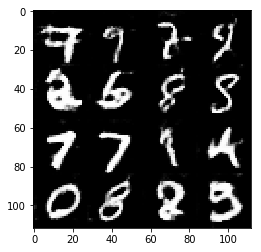

Epoch 2/2... Discriminator Loss: 0.9498... Generator Loss: 1.2197
Epoch 2/2... Discriminator Loss: 1.0749... Generator Loss: 1.3785
Epoch 2/2... Discriminator Loss: 1.0163... Generator Loss: 1.1907
Epoch 2/2... Discriminator Loss: 1.0592... Generator Loss: 1.1480
Epoch 2/2... Discriminator Loss: 1.0267... Generator Loss: 1.2985
Epoch 2/2... Discriminator Loss: 1.2192... Generator Loss: 0.6805
Epoch 2/2... Discriminator Loss: 1.1143... Generator Loss: 1.5956
Epoch 2/2... Discriminator Loss: 1.0511... Generator Loss: 0.9101
Epoch 2/2... Discriminator Loss: 1.0558... Generator Loss: 0.8460
Epoch 2/2... Discriminator Loss: 1.0514... Generator Loss: 0.8406


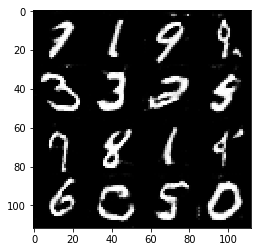

Epoch 2/2... Discriminator Loss: 0.9464... Generator Loss: 1.1667
Epoch 2/2... Discriminator Loss: 1.0659... Generator Loss: 0.9669
Epoch 2/2... Discriminator Loss: 1.1269... Generator Loss: 0.7537
Epoch 2/2... Discriminator Loss: 1.1409... Generator Loss: 1.5343
Epoch 2/2... Discriminator Loss: 1.1077... Generator Loss: 0.7874
Epoch 2/2... Discriminator Loss: 1.1555... Generator Loss: 0.7267
Epoch 2/2... Discriminator Loss: 0.8826... Generator Loss: 1.6733
Epoch 2/2... Discriminator Loss: 1.1227... Generator Loss: 0.7486
Epoch 2/2... Discriminator Loss: 1.4370... Generator Loss: 0.4859
Epoch 2/2... Discriminator Loss: 1.0699... Generator Loss: 0.9061


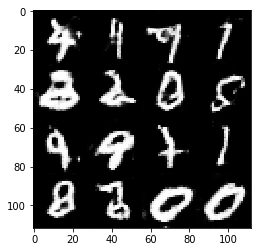

Epoch 2/2... Discriminator Loss: 0.9562... Generator Loss: 1.1429
Epoch 2/2... Discriminator Loss: 1.4732... Generator Loss: 0.4670
Epoch 2/2... Discriminator Loss: 1.0151... Generator Loss: 0.9963
Epoch 2/2... Discriminator Loss: 0.9840... Generator Loss: 1.0479
Epoch 2/2... Discriminator Loss: 0.9386... Generator Loss: 1.3931
Epoch 2/2... Discriminator Loss: 0.9795... Generator Loss: 1.1240
Epoch 2/2... Discriminator Loss: 0.9983... Generator Loss: 1.1317
Epoch 2/2... Discriminator Loss: 0.8681... Generator Loss: 1.3490
Epoch 2/2... Discriminator Loss: 0.8257... Generator Loss: 1.5491
Epoch 2/2... Discriminator Loss: 1.0002... Generator Loss: 0.9772


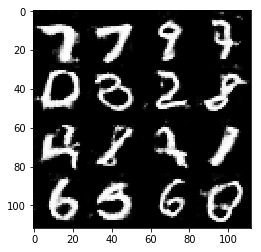

Epoch 2/2... Discriminator Loss: 0.9673... Generator Loss: 1.0600
Epoch 2/2... Discriminator Loss: 1.0298... Generator Loss: 1.9705
Epoch 2/2... Discriminator Loss: 1.2250... Generator Loss: 0.6190
Epoch 2/2... Discriminator Loss: 0.9833... Generator Loss: 1.1362
Epoch 2/2... Discriminator Loss: 1.0121... Generator Loss: 0.9764
Epoch 2/2... Discriminator Loss: 0.9463... Generator Loss: 1.0856
Epoch 2/2... Discriminator Loss: 1.6989... Generator Loss: 0.3898
Epoch 2/2... Discriminator Loss: 1.1353... Generator Loss: 0.6919
Epoch 2/2... Discriminator Loss: 1.0913... Generator Loss: 1.0396
Epoch 2/2... Discriminator Loss: 0.9897... Generator Loss: 1.1649


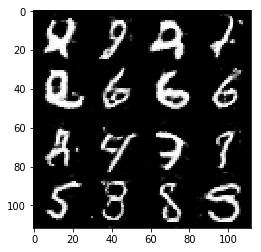

Epoch 2/2... Discriminator Loss: 0.9987... Generator Loss: 0.8810
Epoch 2/2... Discriminator Loss: 1.0810... Generator Loss: 0.8397
Epoch 2/2... Discriminator Loss: 0.9310... Generator Loss: 1.0077
Epoch 2/2... Discriminator Loss: 1.5140... Generator Loss: 1.9866
Epoch 2/2... Discriminator Loss: 0.9474... Generator Loss: 1.1577
Epoch 2/2... Discriminator Loss: 0.9274... Generator Loss: 1.1451
Epoch 2/2... Discriminator Loss: 0.9963... Generator Loss: 0.9764
Epoch 2/2... Discriminator Loss: 1.2130... Generator Loss: 0.6632
Epoch 2/2... Discriminator Loss: 1.0501... Generator Loss: 0.8695
Epoch 2/2... Discriminator Loss: 1.0740... Generator Loss: 0.9089


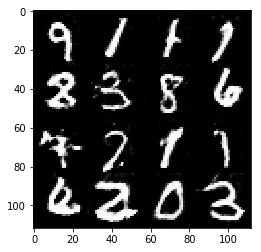

Epoch 2/2... Discriminator Loss: 1.8652... Generator Loss: 0.3507
Epoch 2/2... Discriminator Loss: 1.1506... Generator Loss: 0.7582
Epoch 2/2... Discriminator Loss: 0.9567... Generator Loss: 1.0522
Epoch 2/2... Discriminator Loss: 1.0050... Generator Loss: 0.9831
Epoch 2/2... Discriminator Loss: 1.0601... Generator Loss: 0.8120
Epoch 2/2... Discriminator Loss: 1.0130... Generator Loss: 1.0888
Epoch 2/2... Discriminator Loss: 0.9418... Generator Loss: 1.6825
Epoch 2/2... Discriminator Loss: 1.2388... Generator Loss: 0.6213
Epoch 2/2... Discriminator Loss: 1.0231... Generator Loss: 0.9501
Epoch 2/2... Discriminator Loss: 1.0605... Generator Loss: 0.8248


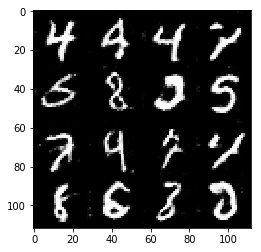

Epoch 2/2... Discriminator Loss: 1.2661... Generator Loss: 0.5798
Epoch 2/2... Discriminator Loss: 1.3245... Generator Loss: 0.6320
Epoch 2/2... Discriminator Loss: 1.0544... Generator Loss: 1.1301
Epoch 2/2... Discriminator Loss: 0.9107... Generator Loss: 1.2637
Epoch 2/2... Discriminator Loss: 1.1291... Generator Loss: 1.2941
Epoch 2/2... Discriminator Loss: 1.1430... Generator Loss: 1.5352
Epoch 2/2... Discriminator Loss: 0.9587... Generator Loss: 1.1449
Epoch 2/2... Discriminator Loss: 0.9047... Generator Loss: 1.1977
Epoch 2/2... Discriminator Loss: 0.9361... Generator Loss: 1.7583
Epoch 2/2... Discriminator Loss: 1.1570... Generator Loss: 0.6956


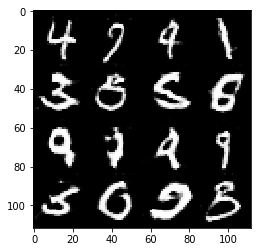

Epoch 2/2... Discriminator Loss: 1.1486... Generator Loss: 1.4642
Epoch 2/2... Discriminator Loss: 1.0657... Generator Loss: 0.8644
Epoch 2/2... Discriminator Loss: 1.3293... Generator Loss: 0.5753
Epoch 2/2... Discriminator Loss: 1.2311... Generator Loss: 1.5613
Epoch 2/2... Discriminator Loss: 0.8806... Generator Loss: 1.6341
Epoch 2/2... Discriminator Loss: 1.0359... Generator Loss: 1.0455
Epoch 2/2... Discriminator Loss: 1.0465... Generator Loss: 0.8426
Epoch 2/2... Discriminator Loss: 1.1314... Generator Loss: 0.7275
Epoch 2/2... Discriminator Loss: 1.0136... Generator Loss: 0.9617
Epoch 2/2... Discriminator Loss: 0.8688... Generator Loss: 1.3918


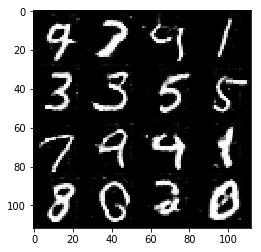

Epoch 2/2... Discriminator Loss: 1.6441... Generator Loss: 0.3710
Epoch 2/2... Discriminator Loss: 1.3199... Generator Loss: 0.5500
Epoch 2/2... Discriminator Loss: 1.1900... Generator Loss: 0.7130
Epoch 2/2... Discriminator Loss: 0.9059... Generator Loss: 1.1723
Epoch 2/2... Discriminator Loss: 1.0706... Generator Loss: 0.9333
Epoch 2/2... Discriminator Loss: 0.7907... Generator Loss: 1.4505
Epoch 2/2... Discriminator Loss: 0.9575... Generator Loss: 0.9526


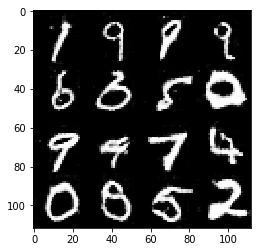

In [90]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

tf.reset_default_graph()

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/3... Discriminator Loss: 0.5156... Generator Loss: 2.9731
Epoch 1/3... Discriminator Loss: 0.5141... Generator Loss: 2.3338
Epoch 1/3... Discriminator Loss: 0.4614... Generator Loss: 3.5954
Epoch 1/3... Discriminator Loss: 1.3011... Generator Loss: 0.6458
Epoch 1/3... Discriminator Loss: 0.9377... Generator Loss: 1.2170
Epoch 1/3... Discriminator Loss: 0.7564... Generator Loss: 2.1983
Epoch 1/3... Discriminator Loss: 0.9235... Generator Loss: 2.9403
Epoch 1/3... Discriminator Loss: 0.5677... Generator Loss: 3.2739
Epoch 1/3... Discriminator Loss: 0.6772... Generator Loss: 1.7990
Epoch 1/3... Discriminator Loss: 0.4557... Generator Loss: 3.1613


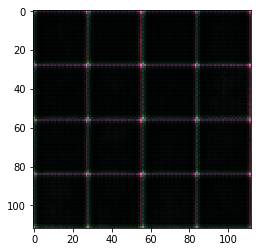

Epoch 1/3... Discriminator Loss: 0.6186... Generator Loss: 1.7958
Epoch 1/3... Discriminator Loss: 0.7593... Generator Loss: 2.0969
Epoch 1/3... Discriminator Loss: 0.5968... Generator Loss: 3.8768
Epoch 1/3... Discriminator Loss: 1.5972... Generator Loss: 5.6941
Epoch 1/3... Discriminator Loss: 0.9341... Generator Loss: 1.1421
Epoch 1/3... Discriminator Loss: 0.6520... Generator Loss: 1.5154
Epoch 1/3... Discriminator Loss: 0.5918... Generator Loss: 1.9594
Epoch 1/3... Discriminator Loss: 2.1135... Generator Loss: 11.1124
Epoch 1/3... Discriminator Loss: 1.3428... Generator Loss: 8.0042
Epoch 1/3... Discriminator Loss: 0.5888... Generator Loss: 2.1892


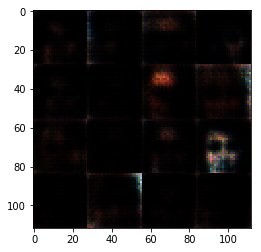

Epoch 1/3... Discriminator Loss: 0.6490... Generator Loss: 1.6663
Epoch 1/3... Discriminator Loss: 1.3122... Generator Loss: 0.6327
Epoch 1/3... Discriminator Loss: 0.7007... Generator Loss: 1.4164
Epoch 1/3... Discriminator Loss: 0.8514... Generator Loss: 5.1545
Epoch 1/3... Discriminator Loss: 0.7610... Generator Loss: 1.2377
Epoch 1/3... Discriminator Loss: 0.8275... Generator Loss: 3.1200
Epoch 1/3... Discriminator Loss: 0.5767... Generator Loss: 2.4192
Epoch 1/3... Discriminator Loss: 1.1463... Generator Loss: 0.7252
Epoch 1/3... Discriminator Loss: 0.4578... Generator Loss: 4.3575
Epoch 1/3... Discriminator Loss: 0.5208... Generator Loss: 2.2215


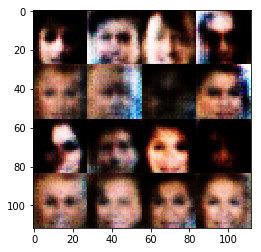

Epoch 1/3... Discriminator Loss: 1.3780... Generator Loss: 0.6500
Epoch 1/3... Discriminator Loss: 0.6575... Generator Loss: 2.0192
Epoch 1/3... Discriminator Loss: 0.6997... Generator Loss: 1.5000
Epoch 1/3... Discriminator Loss: 0.9783... Generator Loss: 1.1359
Epoch 1/3... Discriminator Loss: 1.5595... Generator Loss: 0.4302
Epoch 1/3... Discriminator Loss: 0.9117... Generator Loss: 1.1333
Epoch 1/3... Discriminator Loss: 1.4338... Generator Loss: 0.4765
Epoch 1/3... Discriminator Loss: 1.6410... Generator Loss: 3.2890
Epoch 1/3... Discriminator Loss: 0.8171... Generator Loss: 1.6698
Epoch 1/3... Discriminator Loss: 0.8836... Generator Loss: 1.3918


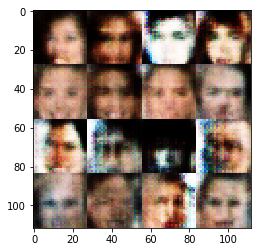

Epoch 1/3... Discriminator Loss: 0.9756... Generator Loss: 1.1748
Epoch 1/3... Discriminator Loss: 0.6343... Generator Loss: 1.7935
Epoch 1/3... Discriminator Loss: 0.7413... Generator Loss: 1.3969
Epoch 1/3... Discriminator Loss: 1.0767... Generator Loss: 1.2434
Epoch 1/3... Discriminator Loss: 0.7700... Generator Loss: 1.4240
Epoch 1/3... Discriminator Loss: 1.9970... Generator Loss: 2.8259
Epoch 1/3... Discriminator Loss: 0.8920... Generator Loss: 1.0202
Epoch 1/3... Discriminator Loss: 0.7784... Generator Loss: 2.0126
Epoch 1/3... Discriminator Loss: 1.7612... Generator Loss: 0.3464
Epoch 1/3... Discriminator Loss: 0.8635... Generator Loss: 1.4114


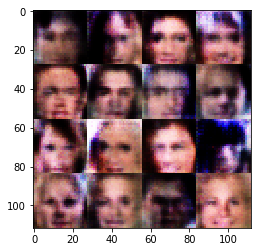

Epoch 1/3... Discriminator Loss: 1.2018... Generator Loss: 0.6583
Epoch 1/3... Discriminator Loss: 1.0192... Generator Loss: 2.0396
Epoch 1/3... Discriminator Loss: 0.9832... Generator Loss: 0.8922
Epoch 1/3... Discriminator Loss: 0.5832... Generator Loss: 2.5969
Epoch 1/3... Discriminator Loss: 1.0268... Generator Loss: 3.5506
Epoch 1/3... Discriminator Loss: 0.7625... Generator Loss: 1.3524
Epoch 1/3... Discriminator Loss: 0.7506... Generator Loss: 1.5407
Epoch 1/3... Discriminator Loss: 2.4634... Generator Loss: 0.1793
Epoch 1/3... Discriminator Loss: 1.0181... Generator Loss: 1.7535
Epoch 1/3... Discriminator Loss: 0.8436... Generator Loss: 1.0846


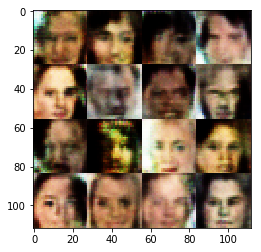

Epoch 1/3... Discriminator Loss: 1.2925... Generator Loss: 0.5786
Epoch 1/3... Discriminator Loss: 1.4336... Generator Loss: 0.9389
Epoch 1/3... Discriminator Loss: 1.0733... Generator Loss: 1.5483
Epoch 1/3... Discriminator Loss: 1.4053... Generator Loss: 0.4809
Epoch 1/3... Discriminator Loss: 0.7162... Generator Loss: 1.7299
Epoch 1/3... Discriminator Loss: 2.0273... Generator Loss: 0.2424
Epoch 1/3... Discriminator Loss: 1.1305... Generator Loss: 1.2594
Epoch 1/3... Discriminator Loss: 0.8145... Generator Loss: 1.6389
Epoch 1/3... Discriminator Loss: 0.9481... Generator Loss: 1.7450
Epoch 1/3... Discriminator Loss: 0.6801... Generator Loss: 1.6568


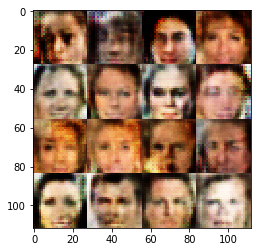

Epoch 1/3... Discriminator Loss: 1.0841... Generator Loss: 1.5106
Epoch 1/3... Discriminator Loss: 0.7106... Generator Loss: 1.6155
Epoch 1/3... Discriminator Loss: 0.9002... Generator Loss: 1.7160
Epoch 1/3... Discriminator Loss: 0.6815... Generator Loss: 2.3091
Epoch 1/3... Discriminator Loss: 1.3571... Generator Loss: 1.6517
Epoch 1/3... Discriminator Loss: 0.9256... Generator Loss: 1.0362
Epoch 1/3... Discriminator Loss: 0.8632... Generator Loss: 1.6870
Epoch 1/3... Discriminator Loss: 0.9483... Generator Loss: 0.9255
Epoch 1/3... Discriminator Loss: 1.1492... Generator Loss: 0.8109
Epoch 1/3... Discriminator Loss: 1.0855... Generator Loss: 1.0328


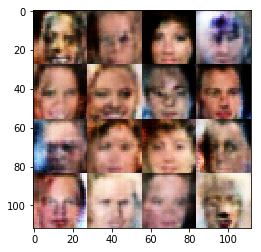

Epoch 1/3... Discriminator Loss: 0.6796... Generator Loss: 2.8028
Epoch 1/3... Discriminator Loss: 1.3796... Generator Loss: 1.2742
Epoch 1/3... Discriminator Loss: 1.2597... Generator Loss: 1.0179
Epoch 1/3... Discriminator Loss: 0.7560... Generator Loss: 1.7774
Epoch 1/3... Discriminator Loss: 1.0091... Generator Loss: 3.2259
Epoch 1/3... Discriminator Loss: 0.6101... Generator Loss: 1.7644
Epoch 1/3... Discriminator Loss: 1.2043... Generator Loss: 0.6717
Epoch 1/3... Discriminator Loss: 1.1750... Generator Loss: 0.7616
Epoch 1/3... Discriminator Loss: 1.0370... Generator Loss: 0.8480
Epoch 1/3... Discriminator Loss: 1.1025... Generator Loss: 0.7645


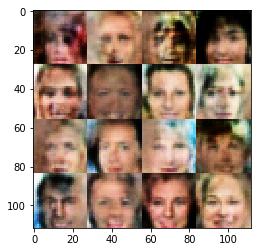

Epoch 1/3... Discriminator Loss: 0.6899... Generator Loss: 2.1011
Epoch 1/3... Discriminator Loss: 0.9799... Generator Loss: 0.8613
Epoch 1/3... Discriminator Loss: 0.4538... Generator Loss: 2.7397
Epoch 1/3... Discriminator Loss: 0.9857... Generator Loss: 1.0635
Epoch 1/3... Discriminator Loss: 1.2292... Generator Loss: 0.6727
Epoch 1/3... Discriminator Loss: 0.9926... Generator Loss: 0.8560
Epoch 1/3... Discriminator Loss: 0.5077... Generator Loss: 2.2454
Epoch 1/3... Discriminator Loss: 1.1341... Generator Loss: 0.8528
Epoch 1/3... Discriminator Loss: 1.2084... Generator Loss: 0.6293
Epoch 1/3... Discriminator Loss: 0.5548... Generator Loss: 3.8194


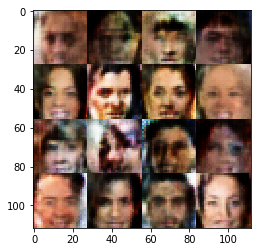

Epoch 1/3... Discriminator Loss: 1.4526... Generator Loss: 1.9005
Epoch 1/3... Discriminator Loss: 1.2526... Generator Loss: 0.7455
Epoch 1/3... Discriminator Loss: 1.1867... Generator Loss: 1.3967
Epoch 1/3... Discriminator Loss: 0.9574... Generator Loss: 1.3833
Epoch 1/3... Discriminator Loss: 0.7608... Generator Loss: 2.1609
Epoch 1/3... Discriminator Loss: 1.0344... Generator Loss: 1.2156
Epoch 1/3... Discriminator Loss: 0.7511... Generator Loss: 1.1803
Epoch 1/3... Discriminator Loss: 0.7358... Generator Loss: 2.9615
Epoch 1/3... Discriminator Loss: 0.6242... Generator Loss: 2.6205
Epoch 1/3... Discriminator Loss: 1.2116... Generator Loss: 0.5995


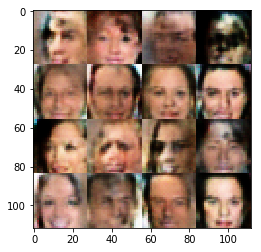

Epoch 1/3... Discriminator Loss: 0.9846... Generator Loss: 1.0085
Epoch 1/3... Discriminator Loss: 1.0511... Generator Loss: 0.9062
Epoch 1/3... Discriminator Loss: 1.1057... Generator Loss: 0.9222
Epoch 1/3... Discriminator Loss: 0.7546... Generator Loss: 1.2496
Epoch 1/3... Discriminator Loss: 0.5805... Generator Loss: 2.2979
Epoch 1/3... Discriminator Loss: 1.1966... Generator Loss: 0.6885
Epoch 1/3... Discriminator Loss: 1.0071... Generator Loss: 0.9562
Epoch 1/3... Discriminator Loss: 0.7212... Generator Loss: 1.6174
Epoch 1/3... Discriminator Loss: 1.2853... Generator Loss: 0.6420
Epoch 1/3... Discriminator Loss: 1.0728... Generator Loss: 0.8957


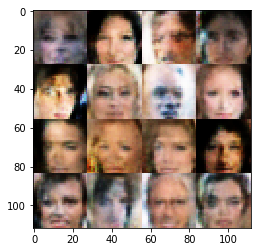

Epoch 1/3... Discriminator Loss: 1.1716... Generator Loss: 0.7200
Epoch 1/3... Discriminator Loss: 0.8769... Generator Loss: 1.4875
Epoch 1/3... Discriminator Loss: 1.6190... Generator Loss: 0.3706
Epoch 1/3... Discriminator Loss: 0.9850... Generator Loss: 1.1725
Epoch 1/3... Discriminator Loss: 0.6254... Generator Loss: 1.9381
Epoch 1/3... Discriminator Loss: 1.3135... Generator Loss: 0.6128
Epoch 1/3... Discriminator Loss: 0.9335... Generator Loss: 1.0758
Epoch 1/3... Discriminator Loss: 1.2058... Generator Loss: 0.8726
Epoch 1/3... Discriminator Loss: 1.4886... Generator Loss: 0.5234
Epoch 1/3... Discriminator Loss: 0.6198... Generator Loss: 1.8826


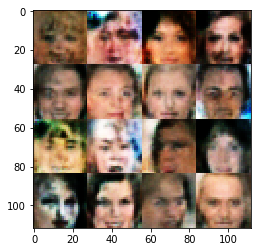

Epoch 1/3... Discriminator Loss: 1.1124... Generator Loss: 2.4609
Epoch 1/3... Discriminator Loss: 1.0112... Generator Loss: 1.2135
Epoch 1/3... Discriminator Loss: 1.3123... Generator Loss: 0.5635
Epoch 1/3... Discriminator Loss: 1.1783... Generator Loss: 0.8487
Epoch 1/3... Discriminator Loss: 0.7516... Generator Loss: 1.4597
Epoch 1/3... Discriminator Loss: 0.5865... Generator Loss: 1.7775
Epoch 1/3... Discriminator Loss: 0.8272... Generator Loss: 1.4445
Epoch 1/3... Discriminator Loss: 0.4952... Generator Loss: 2.8351
Epoch 1/3... Discriminator Loss: 0.9327... Generator Loss: 1.0744
Epoch 1/3... Discriminator Loss: 1.2501... Generator Loss: 1.0566


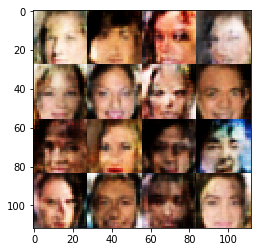

Epoch 1/3... Discriminator Loss: 0.9241... Generator Loss: 2.0977
Epoch 1/3... Discriminator Loss: 0.9606... Generator Loss: 1.4630
Epoch 1/3... Discriminator Loss: 1.0501... Generator Loss: 0.9201
Epoch 1/3... Discriminator Loss: 1.2723... Generator Loss: 0.8853
Epoch 1/3... Discriminator Loss: 1.0279... Generator Loss: 0.8937
Epoch 1/3... Discriminator Loss: 0.6502... Generator Loss: 1.6319
Epoch 1/3... Discriminator Loss: 0.7260... Generator Loss: 1.4573
Epoch 1/3... Discriminator Loss: 0.8897... Generator Loss: 1.1090
Epoch 1/3... Discriminator Loss: 1.1170... Generator Loss: 1.1843
Epoch 1/3... Discriminator Loss: 0.9652... Generator Loss: 0.8799


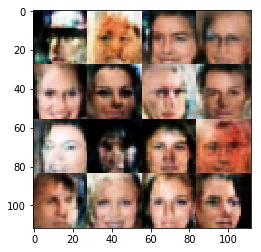

Epoch 1/3... Discriminator Loss: 0.9814... Generator Loss: 0.8811
Epoch 1/3... Discriminator Loss: 1.1736... Generator Loss: 0.7629
Epoch 1/3... Discriminator Loss: 0.8203... Generator Loss: 1.4635
Epoch 1/3... Discriminator Loss: 0.5509... Generator Loss: 2.1617
Epoch 1/3... Discriminator Loss: 1.2116... Generator Loss: 0.9121
Epoch 1/3... Discriminator Loss: 0.9673... Generator Loss: 1.3039
Epoch 1/3... Discriminator Loss: 0.8256... Generator Loss: 1.6139
Epoch 1/3... Discriminator Loss: 0.6956... Generator Loss: 1.4323
Epoch 1/3... Discriminator Loss: 0.6599... Generator Loss: 3.1727
Epoch 1/3... Discriminator Loss: 1.2642... Generator Loss: 0.8753


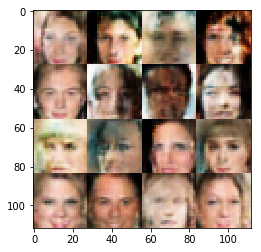

Epoch 1/3... Discriminator Loss: 0.7833... Generator Loss: 2.5135
Epoch 1/3... Discriminator Loss: 1.3677... Generator Loss: 0.6968
Epoch 1/3... Discriminator Loss: 1.5777... Generator Loss: 0.4325
Epoch 1/3... Discriminator Loss: 1.7140... Generator Loss: 0.3527
Epoch 1/3... Discriminator Loss: 1.7395... Generator Loss: 0.3429
Epoch 1/3... Discriminator Loss: 0.9788... Generator Loss: 1.4875
Epoch 1/3... Discriminator Loss: 0.9976... Generator Loss: 1.0292
Epoch 1/3... Discriminator Loss: 1.0968... Generator Loss: 0.8629
Epoch 1/3... Discriminator Loss: 0.5105... Generator Loss: 2.9242
Epoch 1/3... Discriminator Loss: 1.0586... Generator Loss: 0.7617


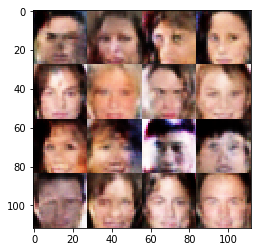

Epoch 1/3... Discriminator Loss: 1.1701... Generator Loss: 0.9923
Epoch 1/3... Discriminator Loss: 0.7401... Generator Loss: 1.9944
Epoch 1/3... Discriminator Loss: 1.0211... Generator Loss: 0.8516
Epoch 1/3... Discriminator Loss: 0.8073... Generator Loss: 1.3298
Epoch 1/3... Discriminator Loss: 1.0102... Generator Loss: 0.9866
Epoch 1/3... Discriminator Loss: 1.2322... Generator Loss: 0.7666
Epoch 1/3... Discriminator Loss: 0.9898... Generator Loss: 1.0782
Epoch 1/3... Discriminator Loss: 1.8469... Generator Loss: 0.2919
Epoch 1/3... Discriminator Loss: 0.9553... Generator Loss: 0.8878
Epoch 1/3... Discriminator Loss: 1.0819... Generator Loss: 0.8044


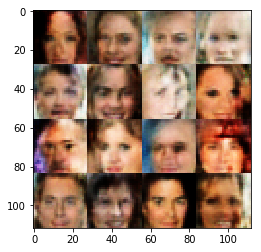

Epoch 1/3... Discriminator Loss: 1.3402... Generator Loss: 1.3437
Epoch 1/3... Discriminator Loss: 1.2881... Generator Loss: 0.5898
Epoch 1/3... Discriminator Loss: 1.0510... Generator Loss: 2.2647
Epoch 1/3... Discriminator Loss: 1.3427... Generator Loss: 0.5448
Epoch 1/3... Discriminator Loss: 1.1408... Generator Loss: 0.6833
Epoch 1/3... Discriminator Loss: 0.8420... Generator Loss: 1.7964
Epoch 1/3... Discriminator Loss: 0.8427... Generator Loss: 1.6305
Epoch 1/3... Discriminator Loss: 1.0753... Generator Loss: 1.7272
Epoch 1/3... Discriminator Loss: 1.3036... Generator Loss: 0.5978
Epoch 1/3... Discriminator Loss: 0.8608... Generator Loss: 1.3494


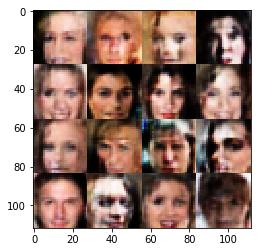

Epoch 1/3... Discriminator Loss: 1.2394... Generator Loss: 0.6247


KeyboardInterrupt: 

In [91]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 3

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.